In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import read_params_and_metrics, graficar_correlacion

id = ["name", "run_uuid"]
architecture = [
    "arc_num_conv1",
    "arc_num_layers",
    "arc_num_conv2",
    "arc_latent_volume",
    "arc_latent_dim",
    "arc_skip",
]

train = ["train_loss", "train_Accuracy", "train_Accuracy_seq"]

valid = ["valid_loss", "valid_Accuracy", "valid_Accuracy_seq"]

test = [
    "test_loss",
    "test_Accuracy",
    "test_Accuracy_seq",
]

columns = id + architecture + train + valid + test

In [2]:
BASE_PATH = "/home/guillermo/Documents/SINC/Research/RNA/analysis/AEseq2seq/"
v4p = "notebooks/from_db/Unet/selection/v4p/"
v4c = "notebooks/from_db/Unet/selection/v4c/"

In [3]:
v4p, mp = read_params_and_metrics(BASE_PATH, v4p, columns)
v4c, mc = read_params_and_metrics(BASE_PATH, v4c, columns)

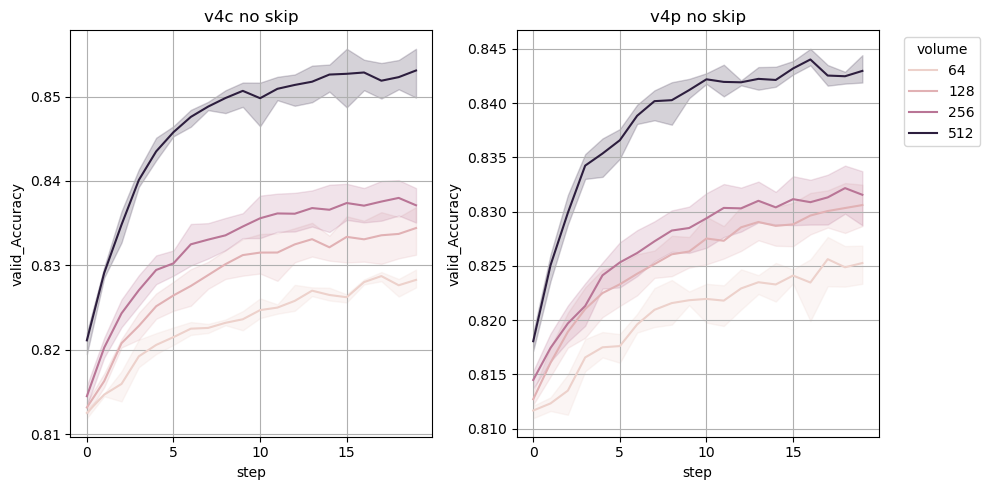

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].set_title("v4p no skip")
sns.lineplot(
    data=mp[mp["arc_skip"] == 0],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    ax=ax[1],
)

ax[0].set_title("v4c no skip")
sns.lineplot(
    data=mc[mc["arc_skip"] == 0],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    ax=ax[0],
    legend=False,
)
ax[1].legend(title="volume", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)


fig.tight_layout()

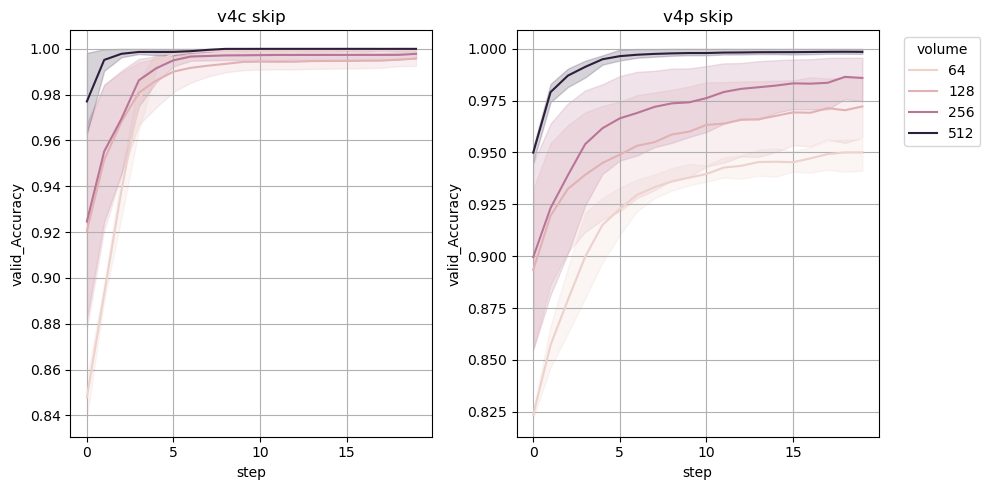

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].set_title("v4p skip")
sns.lineplot(
    data=mp[mp["arc_skip"] == 1],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    ax=ax[1],
)

ax[0].set_title("v4c skip")
sns.lineplot(
    data=mc[mc["arc_skip"] == 1],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    ax=ax[0],
    legend=False,
)
ax[1].legend(title="volume", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].set_title("v4p skip")
sns.lineplot(
    data=mp[mp["arc_skip"] == 1],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    ax=ax[1],
)

ax[0].set_title("v4c skip")
sns.lineplot(
    data=mc[mc["arc_skip"] == 1],
    x="step",
    y="valid_Accuracy",
    hue="arc_latent_volume",
    ax=ax[0],
    legend=False,
)
ax[1].legend(title="volume", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()

In [4]:
data = pd.concat([v4p, v4c])

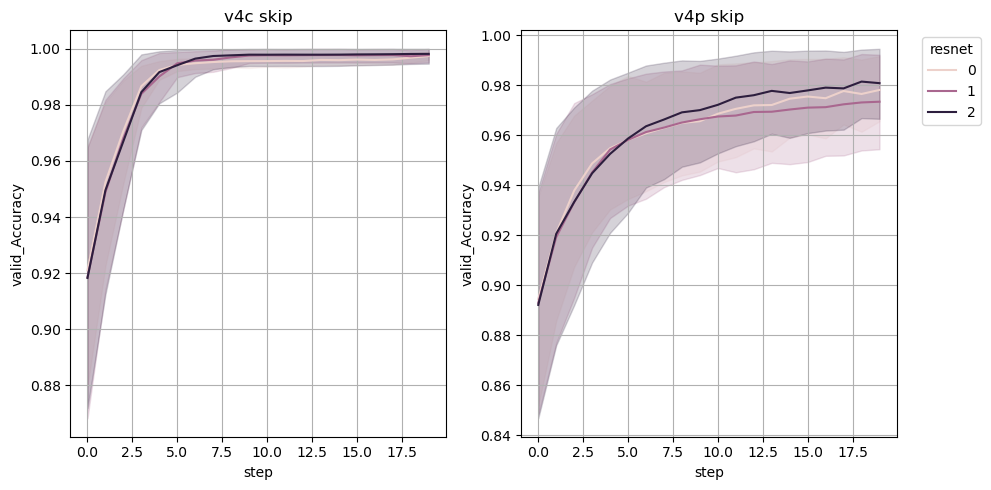

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].set_title("v4p skip")
sns.lineplot(
    data=mp[mp["arc_skip"] == 1],
    x="step",
    y="valid_Accuracy",
    hue="arc_num_layers",
    ax=ax[1],
)

ax[0].set_title("v4c skip")
sns.lineplot(
    data=mc[mc["arc_skip"] == 1],
    x="step",
    y="valid_Accuracy",
    hue="arc_num_layers",
    ax=ax[0],
    legend=False,
)
ax[1].legend(title="resnet", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()

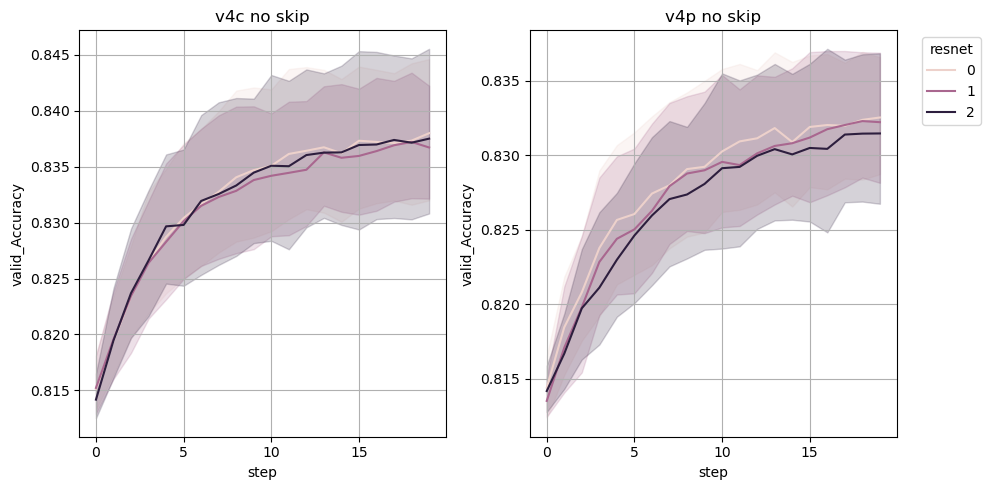

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[1].set_title("v4p no skip")
sns.lineplot(
    data=mp[mp["arc_skip"] == 0],
    x="step",
    y="valid_Accuracy",
    hue="arc_num_layers",
    ax=ax[1],
)

ax[0].set_title("v4c no skip")
sns.lineplot(
    data=mc[mc["arc_skip"] == 0],
    x="step",
    y="valid_Accuracy",
    hue="arc_num_layers",
    ax=ax[0],
    legend=False,
)
ax[1].legend(title="resnet", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()

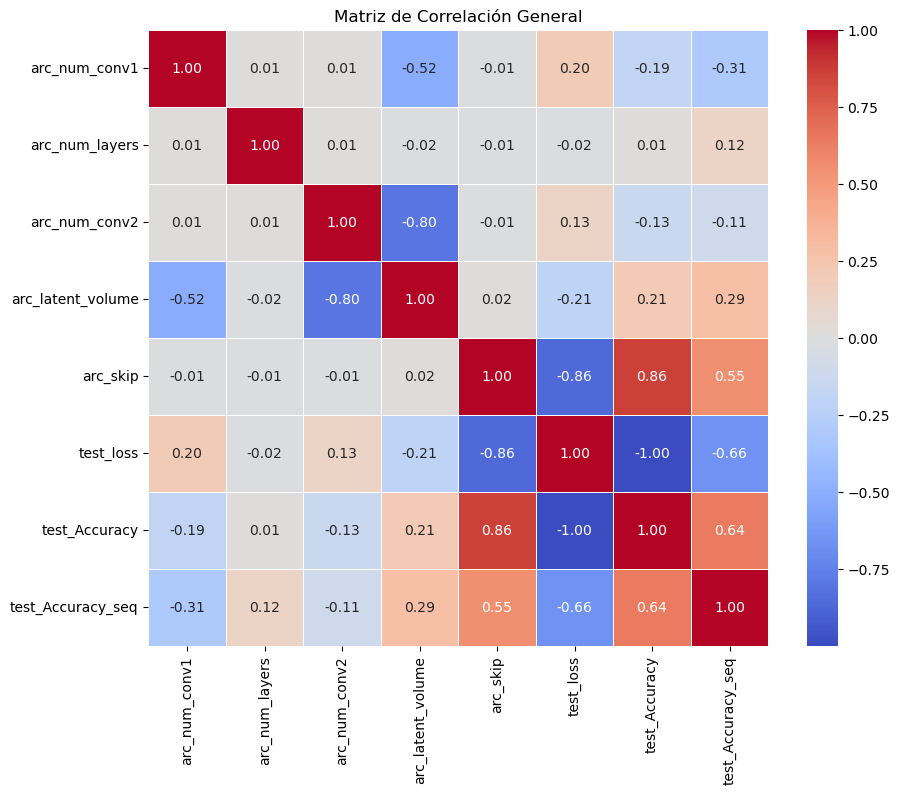

In [8]:
graficar_correlacion(data, architecture + test, "Matriz de Correlación General")

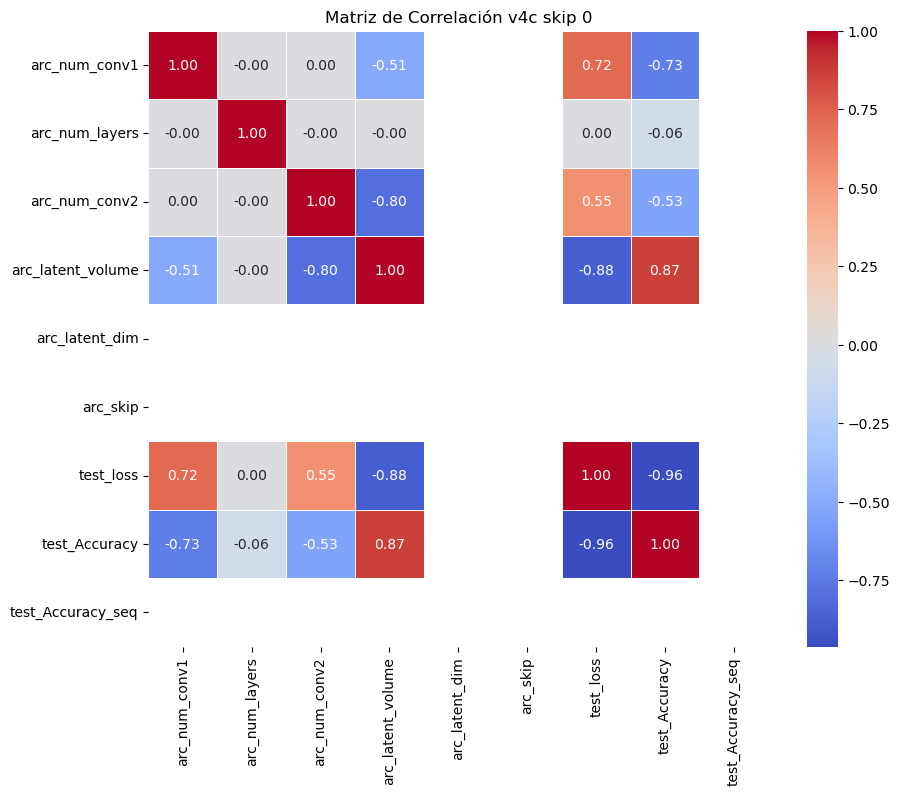

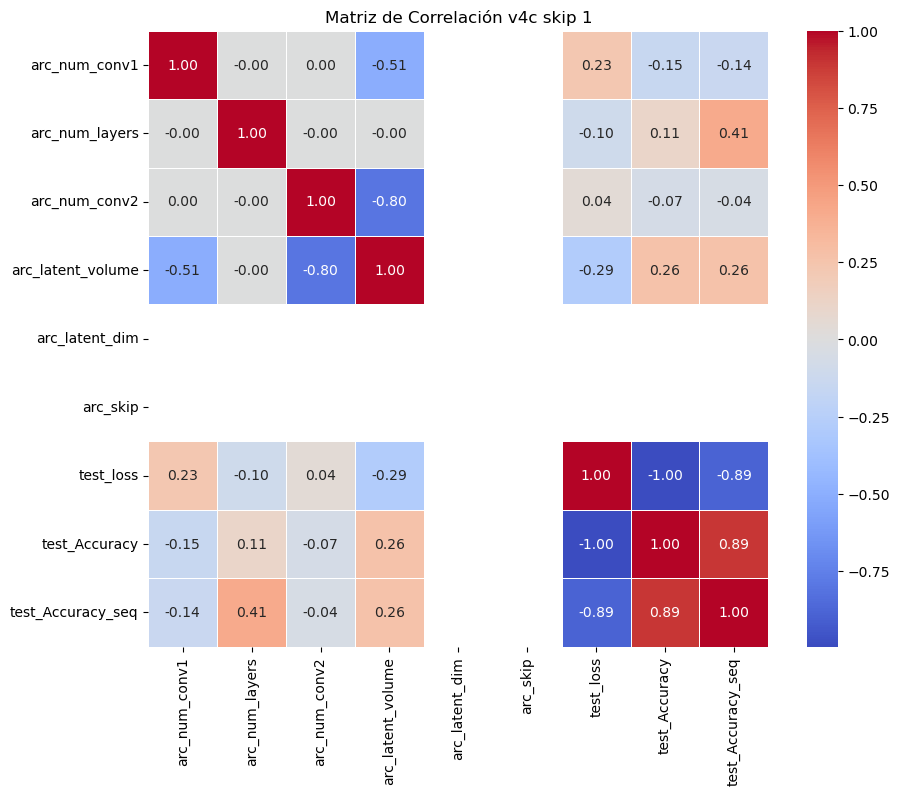

In [19]:
for skip in [0, 1]:
    graficar_correlacion(
        v4c[v4c["arc_skip"] == skip],
        architecture + test,
        "Matriz de Correlación v4c skip " + str(skip),
    )

In [10]:
ax = sns.boxplot(
    data=data[data["arc_skip"] == 1],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

ValueError: Could not interpret value `arc_latent_dim` for `x`. An entry with this name does not appear in `data`.

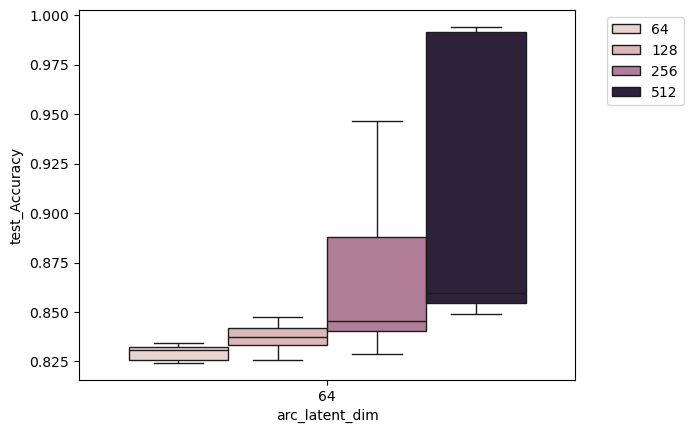

In [ ]:
ax = sns.boxplot(
    data=data[data["arc_skip"] == 0],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

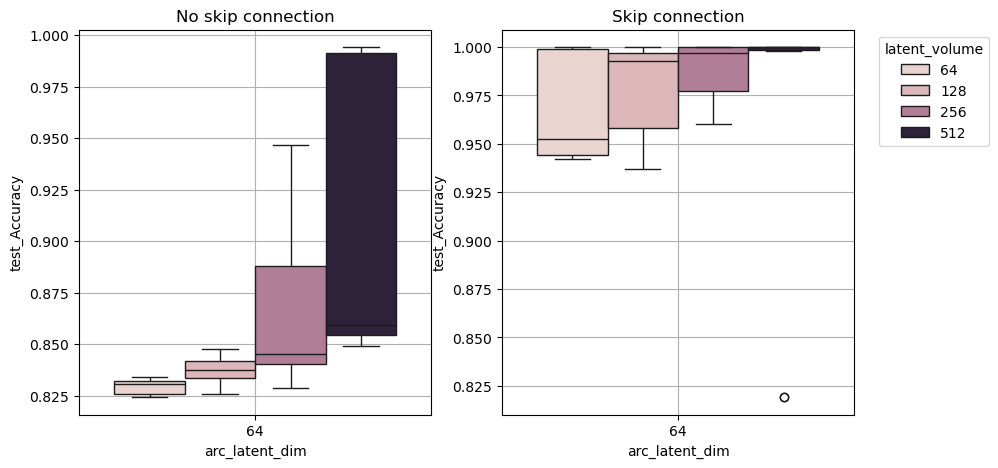

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))


ax[0].set_title("No skip connection")
sns.boxplot(
    data=data[(data["arc_skip"] == 0) & (data["arc_encoder_blocks"] == 2)],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("Skip connection")
sns.boxplot(
    data=data[(data["arc_skip"] == 1) & (data["arc_encoder_blocks"] == 2)],
    x="arc_latent_dim",
    y="test_Accuracy",
    hue="arc_latent_volume",
    ax=ax[1],
)
ax[1].legend(title="latent_volume", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)

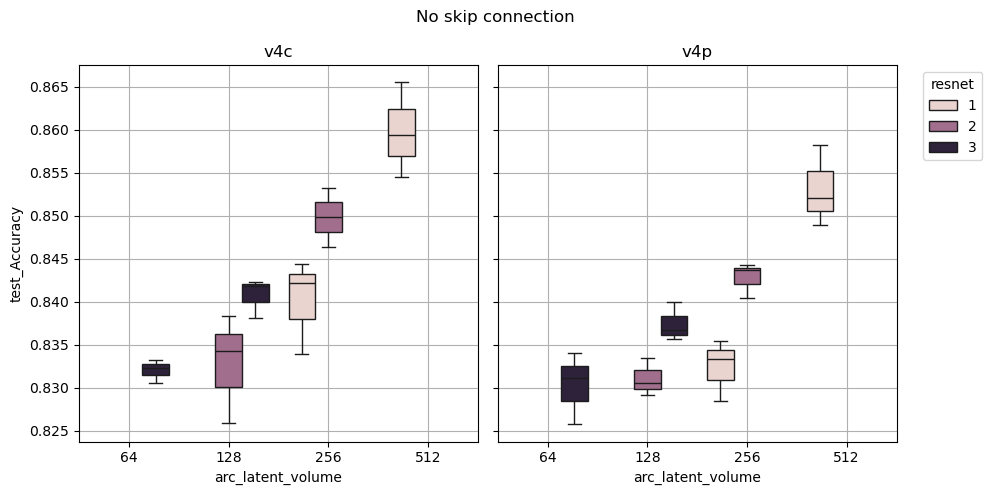

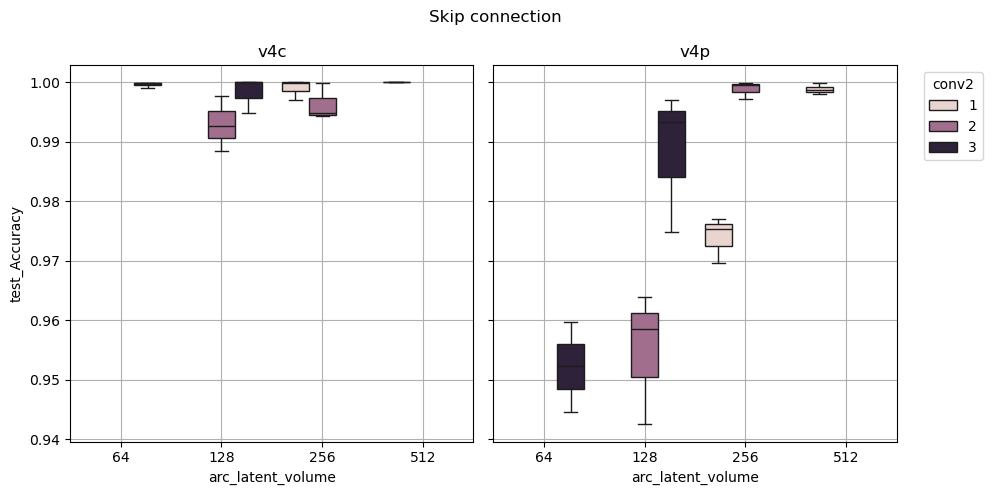

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].set_title("v4c")
sns.boxplot(
    data=v4c[(v4c["arc_skip"] == 0)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_conv2",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("v4p")
sns.boxplot(
    data=v4p[(v4p["arc_skip"] == 0)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_conv2",
    ax=ax[1],
)

for a in ax:
    a.grid(True)

ax[1].legend(title="resnet", bbox_to_anchor=(1.05, 1), loc="upper left")
fig.suptitle("No skip connection")
fig.tight_layout()


fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].set_title("v4c")
sns.boxplot(
    data=v4c[(v4c["arc_skip"] == 1)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_conv2",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("v4p")
sns.boxplot(
    data=v4p[(v4p["arc_skip"] == 1)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_conv2",
    ax=ax[1],
)

for a in ax:
    a.grid(True)

ax[1].legend(title="conv2", bbox_to_anchor=(1.05, 1), loc="upper left")
fig.suptitle("Skip connection")
fig.tight_layout()

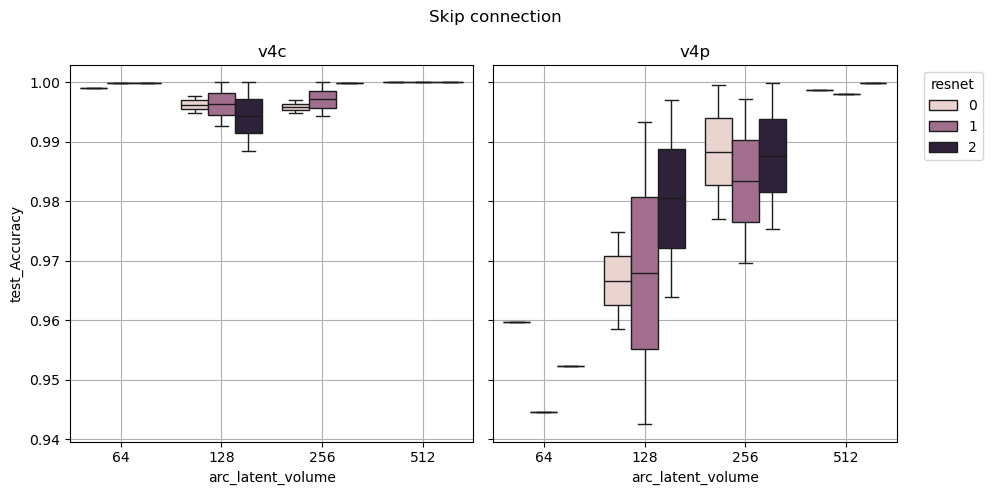

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].set_title("v4c")
sns.boxplot(
    data=v4c[(v4c["arc_skip"] == 1)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_latent_dim",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("v4p")
sns.boxplot(
    data=v4p[(v4p["arc_skip"] == 1)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_latent_dim",
    ax=ax[1],
)

for a in ax:
    a.grid(True)

ax[1].legend(title="resnet", bbox_to_anchor=(1.05, 1), loc="upper left")
fig.suptitle("Skip connection")
fig.tight_layout()

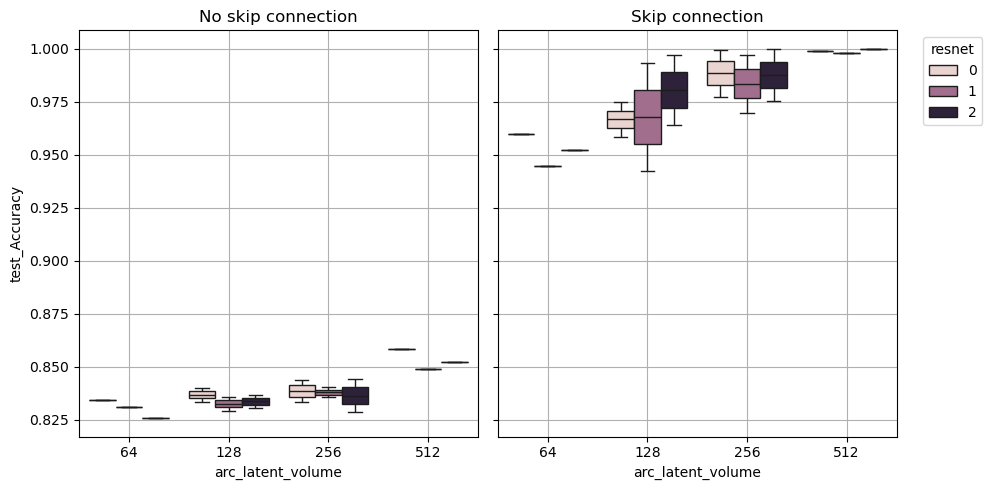

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].set_title("No skip connection")
sns.boxplot(
    data=v4p[(v4p["arc_skip"] == 0)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[0],
    legend=False,
)

ax[1].set_title("Skip connection")
sns.boxplot(
    data=v4p[(v4p["arc_skip"] == 1)],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[1],
)
ax[1].legend(title="resnet", bbox_to_anchor=(1.05, 1), loc="upper left")
for a in ax:
    a.grid(True)
fig.tight_layout()

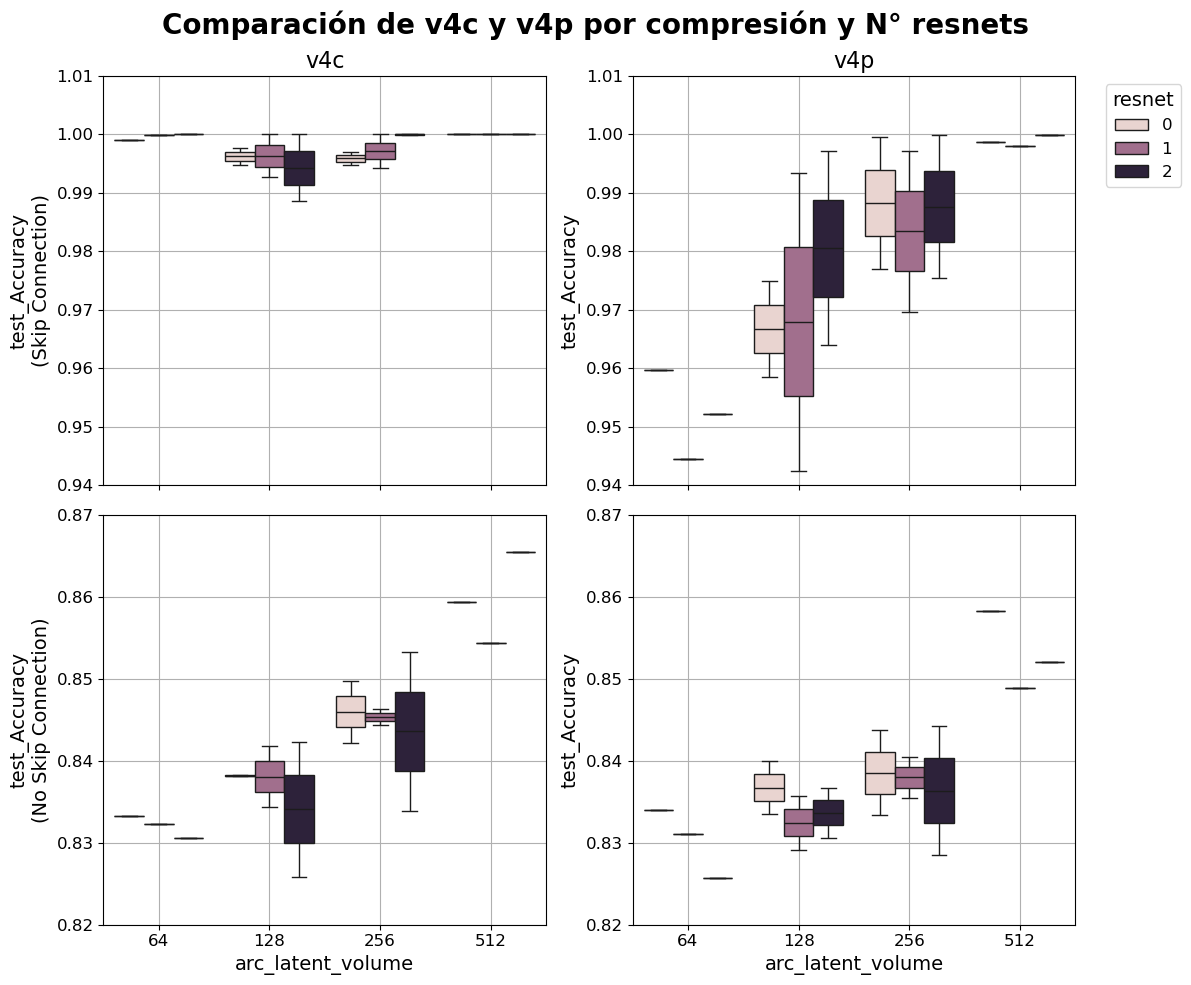

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Primera fila (Skip connection)
ax[0, 0].set_title("v4c", fontsize=16)
sns.boxplot(
    data=v4c[v4c["arc_skip"] == 1],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[0, 0],
    legend=False,
)
ax[0, 1].set_title("v4p", fontsize=16)
sns.boxplot(
    data=v4p[v4p["arc_skip"] == 1],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[0, 1],
)

# Segunda fila (No skip connection)
sns.boxplot(
    data=v4c[v4c["arc_skip"] == 0],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[1, 0],
    legend=False,
)
sns.boxplot(
    data=v4p[v4p["arc_skip"] == 0],
    x="arc_latent_volume",
    y="test_Accuracy",
    hue="arc_num_layers",
    ax=ax[1, 1],
    legend=False,
)

# Ajustar ejes y etiquetas
for i in range(2):
    for j in range(2):
        ax[i, j].grid(True)
        ax[i, j].set_xlabel("arc_latent_volume", fontsize=14)
        ax[i, j].set_ylabel("test_Accuracy", fontsize=14)
        ax[i, j].tick_params(axis="both", labelsize=12)

# Ajustar límites de los ejes Y
ax[0, 0].set_ylim(0.94, 1.01)
ax[0, 1].set_ylim(0.94, 1.01)
ax[1, 0].set_ylim(0.82, 0.87)
ax[1, 1].set_ylim(0.82, 0.87)

# Agregar leyenda solo en la esquina superior derecha
handles, labels = ax[0, 1].get_legend_handles_labels()
ax[0, 1].legend(
    handles,
    labels,
    title="resnet",
    fontsize=12,
    title_fontsize=14,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

# Títulos globales
fig.suptitle(
    "Comparación de v4c y v4p por compresión y N° resnets",
    fontsize=20,
    fontweight="bold",
)
ax[0, 0].set_ylabel("test_Accuracy\n(Skip Connection)", fontsize=14)
ax[1, 0].set_ylabel("test_Accuracy\n(No Skip Connection)", fontsize=14)

fig.tight_layout()
plt.show()